In [26]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import operator
from colorama import Fore, init
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [27]:
df = pd.read_csv("mcdonalds.csv")

In [28]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [29]:
df.shape

(1453, 15)

In [30]:
df.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().count()


yummy             1453
convenient        1453
spicy             1453
fattening         1453
greasy            1453
fast              1453
cheap             1453
tasty             1453
expensive         1453
healthy           1453
disgusting        1453
Like              1453
Age               1453
VisitFrequency    1453
Gender            1453
dtype: int64

In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()



In [34]:
categorical_cols

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'VisitFrequency',
 'Gender']

In [35]:
numerical_cols

['Age']

<Axes: ylabel='Like'>

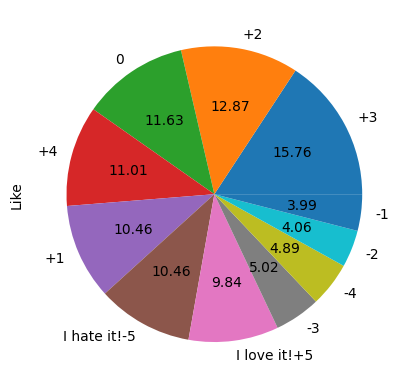

In [36]:
df['Like'].value_counts().plot(kind='pie',autopct='%.2f')

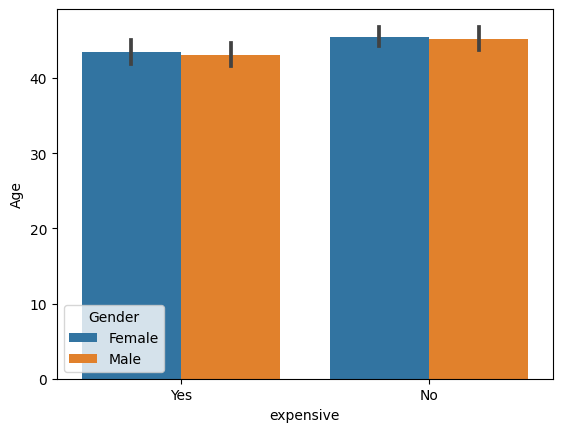

In [38]:
sns.barplot(x=df['expensive'], y=df['Age'], hue=df['Gender'])

#
plt.show()

<Axes: >

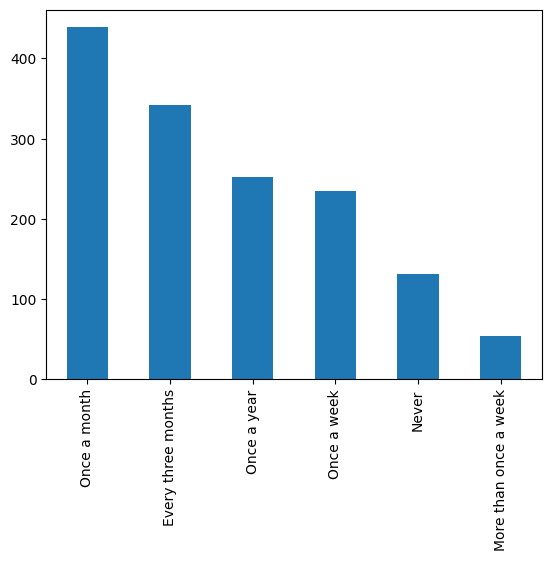

In [39]:
df['VisitFrequency'].value_counts().plot(kind='bar')

<Axes: >

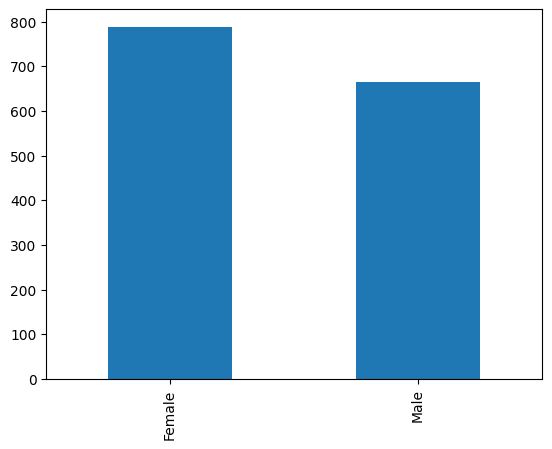

In [40]:
df['Gender'].value_counts().plot(kind='bar')

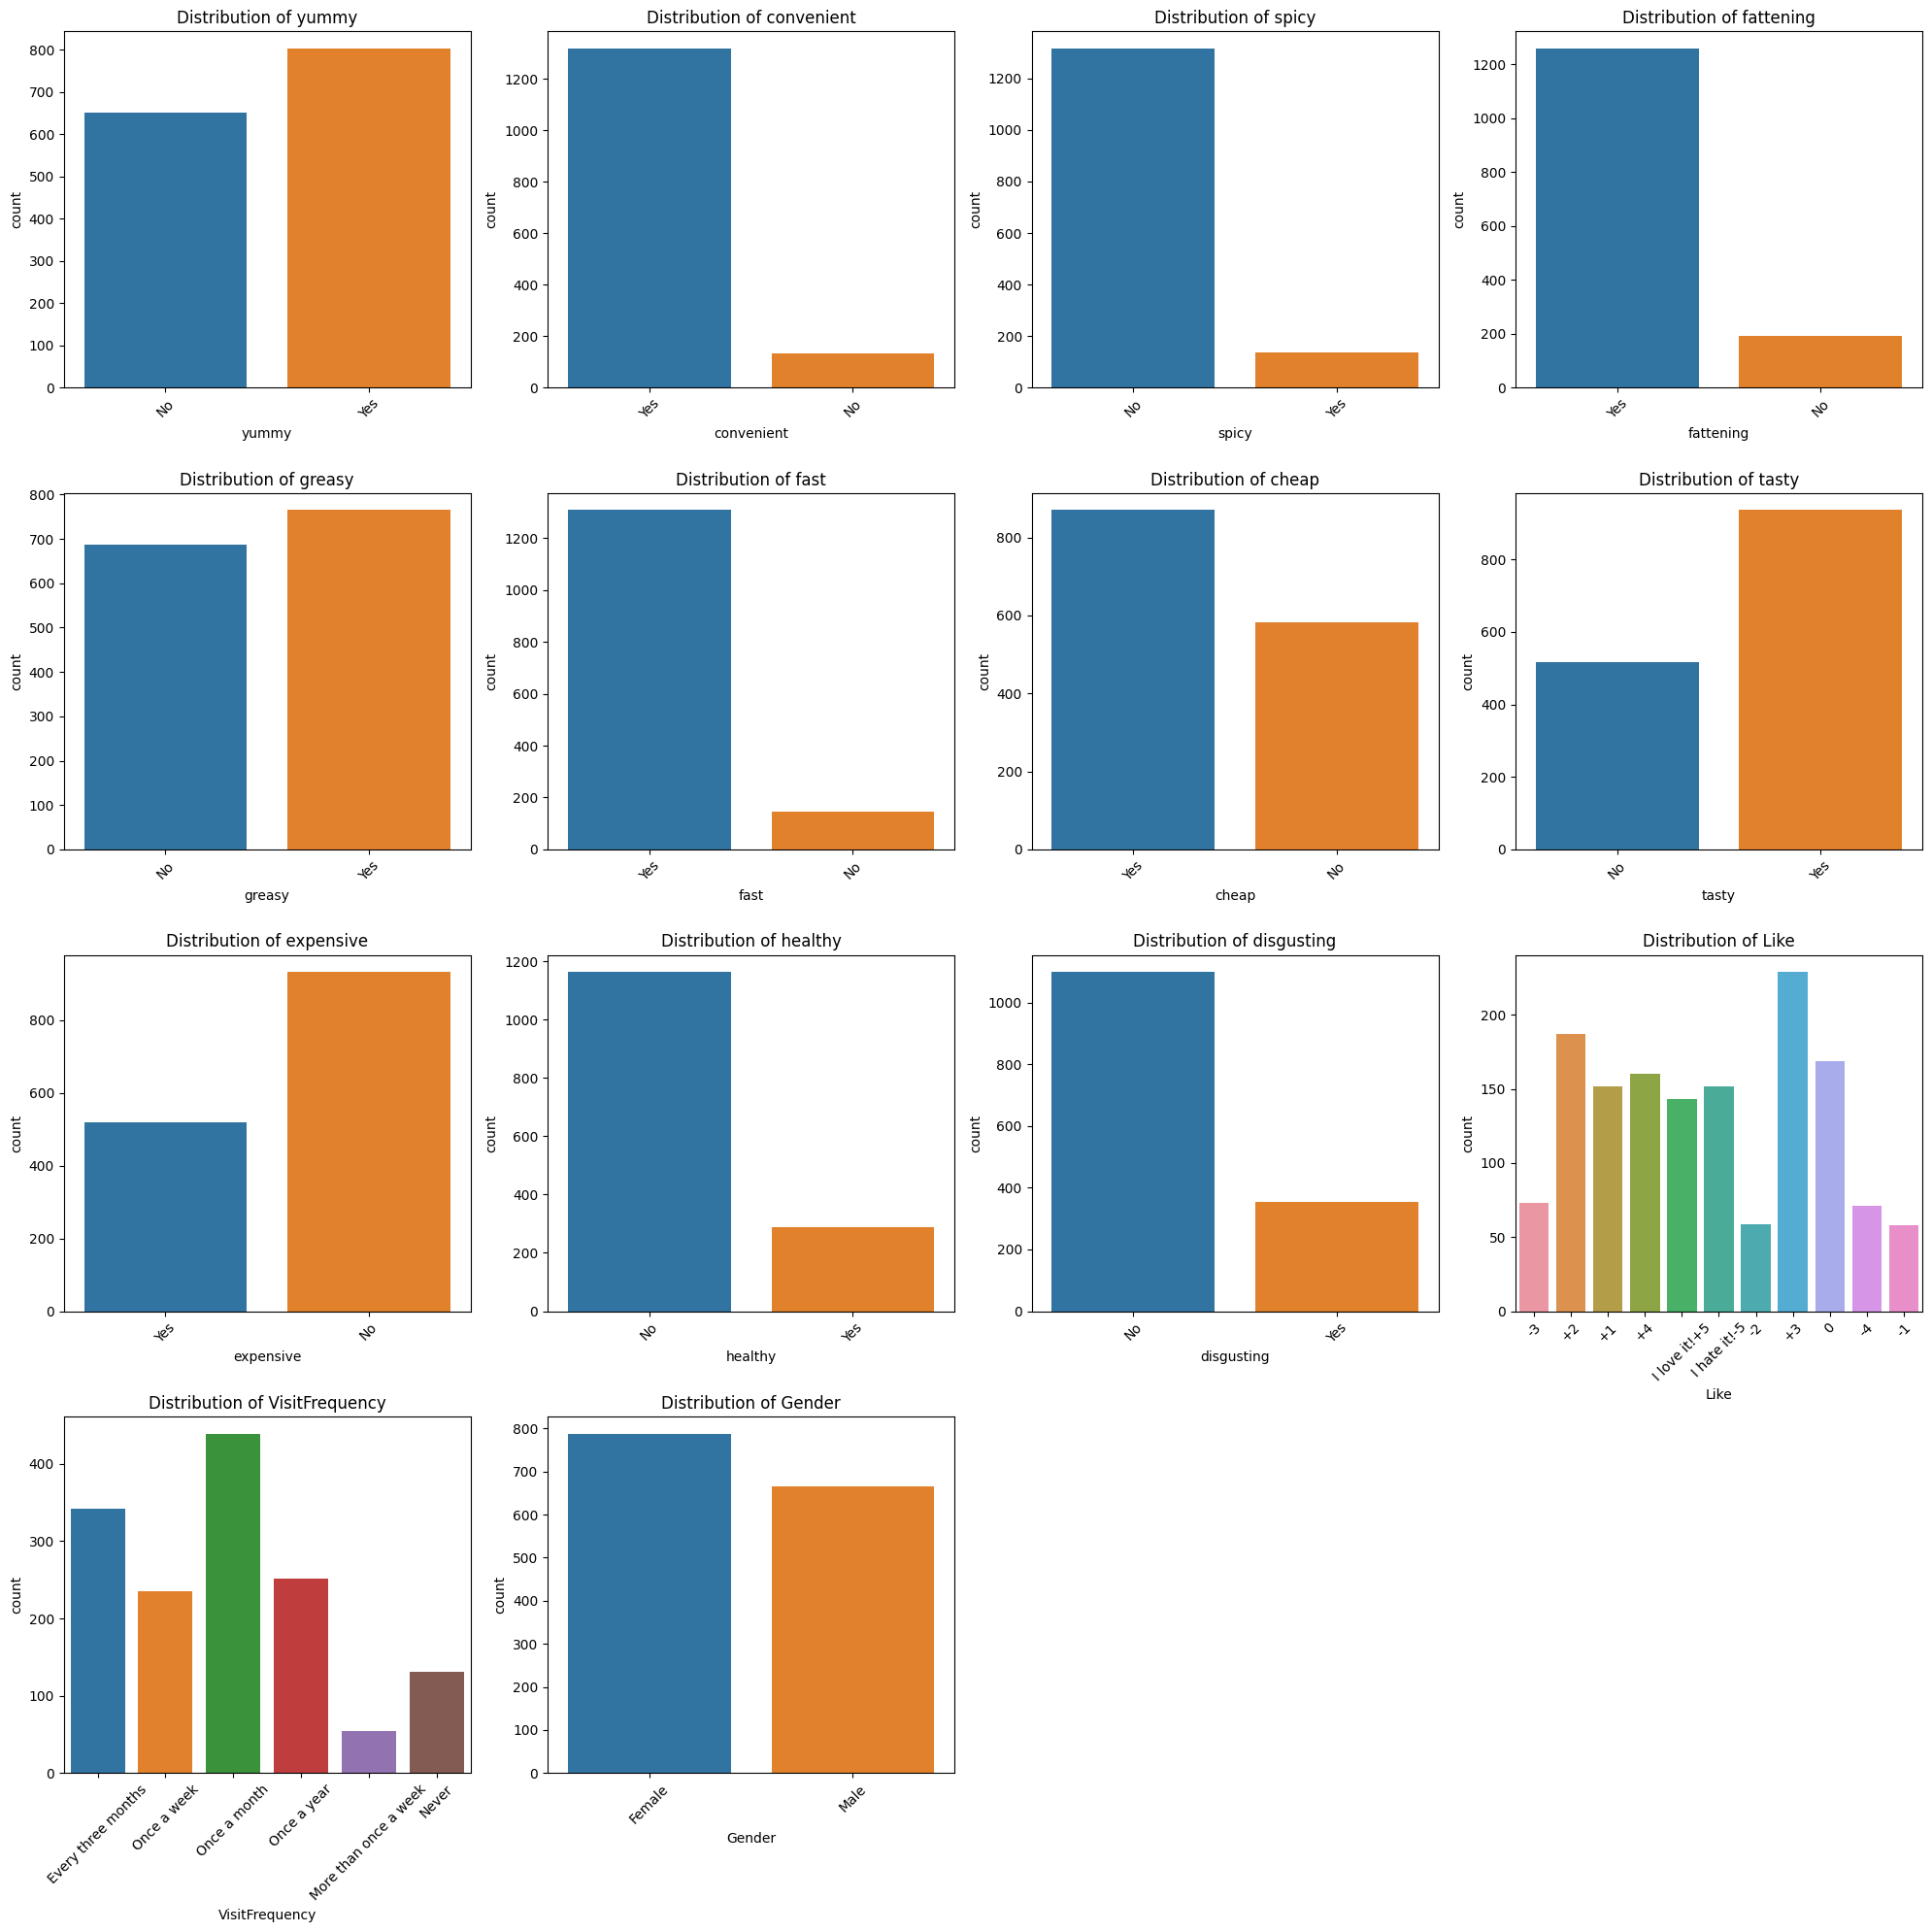

In [41]:
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 4, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
df.describe()


,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [44]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [45]:
# MAIN PART


In [46]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

df_numeric = pd.get_dummies(df, drop_first=True)

print("\nFirst few rows of the transformed dataset:")
print(df_numeric.head())



First few rows of the transformed dataset:
   Age  yummy_Yes  convenient_Yes  spicy_Yes  fattening_Yes  greasy_Yes  \
0   61          0               1          0              1           0   
1   51          1               1          0              1           1   
2   62          0               1          1              1           1   
3   69          1               1          0              1           1   
4   49          0               1          0              1           1   

   fast_Yes  cheap_Yes  tasty_Yes  expensive_Yes  ...  Like_-4  Like_0  \
0         1          1          0              1  ...        0       0   
1         1          1          1              1  ...        0       0   
2         1          0          1              1  ...        0       0   
3         1          1          1              0  ...        0       0   
4         1          1          0              0  ...        0       0   

   Like_I hate it!-5  Like_I love it!+5  VisitFrequency_More

In [47]:


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


pca = PCA(n_components=2)  


df_pca = pca.fit_transform(df_scaled)


components = pca.components_
explained_variance = pca.explained_variance_ratio_

print("\nPCA Components:\n", components)
print("\nExplained Variance Ratio:\n", explained_variance)



PCA Components:
 [[ 0.11975065 -0.37913055 -0.2518571  -0.00135889  0.10907787  0.17803911
  -0.12875691 -0.14603309 -0.37420014  0.14145157 -0.18588201  0.34403909
  -0.07817926 -0.15740596 -0.15128567  0.04149125  0.07460824  0.11391957
   0.13941616  0.05070146  0.30223661 -0.1634622  -0.08986536  0.26570607
  -0.18055779 -0.14545274  0.18866818  0.04349729]
 [-0.31448138  0.20557441 -0.1525059  -0.03763539  0.06416849  0.15889185
  -0.25220208 -0.47986361  0.12620582  0.51927085 -0.03568411  0.07795529
  -0.00746864  0.10089835  0.05514568 -0.09347438 -0.06027622 -0.0951505
  -0.13090275 -0.11684724  0.12213164  0.1171616   0.08319756  0.04448201
   0.10323041  0.11804618 -0.24896404  0.16851728]]

Explained Variance Ratio:
 [0.14736657 0.0688042 ]


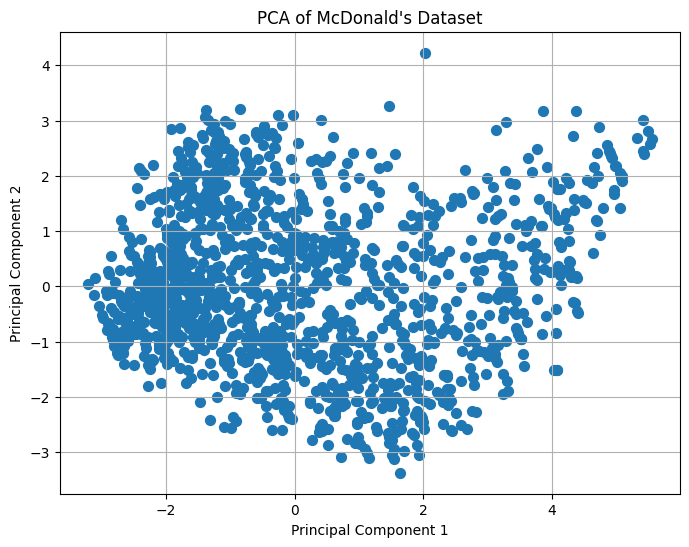

In [48]:



pca_df = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])


plt.figure(figsize=(8,6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], s=50)
plt.title('PCA of McDonald\'s Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [49]:


pipelines = {
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('svm', SVC(kernel='linear'))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('rf', RandomForestClassifier(n_estimators=100))
    ]),
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('lr', LogisticRegression())
    ])
}


X_train, X_test, y_train, y_test = train_test_split(df_numeric, y, test_size=0.3, random_state=42)


for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"\n{name} Classifier:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



KNN Classifier:
Accuracy: 0.6077981651376146
Classification Report:
               precision    recall  f1-score   support

      Female       0.62      0.66      0.64       231
        Male       0.59      0.55      0.57       205

    accuracy                           0.61       436
   macro avg       0.61      0.60      0.60       436
weighted avg       0.61      0.61      0.61       436


SVM Classifier:
Accuracy: 0.5848623853211009
Classification Report:
               precision    recall  f1-score   support

      Female       0.59      0.69      0.64       231
        Male       0.57      0.46      0.51       205

    accuracy                           0.58       436
   macro avg       0.58      0.58      0.58       436
weighted avg       0.58      0.58      0.58       436


Random Forest Classifier:
Accuracy: 0.573394495412844
Classification Report:
               precision    recall  f1-score   support

      Female       0.59      0.65      0.62       231
        Male      